# Final project notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip3 install -q pybind11
!pip uninstall -q --yes gdown
!pip install -q gdown -U --no-cache-dir

In [3]:
# Code to set up the assignment
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/
    !mkdir -p 10714
    %cd /content/drive/MyDrive/10714
    !git clone https://github.com/Edyarich/dlsystems-final-project
    %cd /content/drive/MyDrive/10714/dlsystems-final-project

In [4]:
!make

-- Found pybind11: /usr/include (found version "2.10.1")
CUDA_TOOLKIT_ROOT_DIR not found or specified
-- Could NOT find CUDA (missing: CUDA_TOOLKIT_ROOT_DIR CUDA_NVCC_EXECUTABLE CUDA_INCLUDE_DIRS CUDA_CUDART_LIBRARY) 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/gensenju/Documents/dlsystems-final-project/build
make[1]: Entering directory '/home/gensenju/Documents/dlsystems-final-project/build'
make[2]: Entering directory '/home/gensenju/Documents/dlsystems-final-project/build'
make[3]: Entering directory '/home/gensenju/Documents/dlsystems-final-project/build'
make[3]: Leaving directory '/home/gensenju/Documents/dlsystems-final-project/build'
make[3]: Entering directory '/home/gensenju/Documents/dlsystems-final-project/build'
[ 50%] Building CXX object CMakeFiles/ndarray_backend_cpu.dir/src/ndarray_backend_cpu.cc.o
[100%] Linking CXX shared module /home/gensenju/Documents/dlsystems-final-project/python/needle/backend_ndarray/ndarray_backend_cpu.cpyt

In [7]:
import sys
sys.path.append('./python')
sys.path.append('./data/')

In [8]:
# Download the datasets you will be using for this project
import os
import gdown
import importlib
from data.utils import rename_and_filter_images
import urllib.request


%cd ./data
DIRNAME = './landscapes/'

if not os.path.exists(DIRNAME):
    !gdown 14g49ILtIYKLt7WXaRPYyVfJGLHxcnQ7s
    !unzip -q landscapes -d landscapes
    !rm landscapes.zip

    rename_and_filter_images(DIRNAME)

if not os.path.isdir("./cifar-10-batches-py"):
    urllib.request.urlretrieve("https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz", "./cifar-10-python.tar.gz")
    !tar -xvzf './cifar-10-python.tar.gz'

%cd ../

/home/gensenju/Documents/dlsystems-final-project/data
Downloading...
From: https://drive.google.com/uc?id=14g49ILtIYKLt7WXaRPYyVfJGLHxcnQ7s
To: /home/gensenju/Documents/dlsystems-final-project/data/landscapes.zip
100%|████████████████████████████████████████| 650M/650M [00:59<00:00, 11.0MB/s]
/bin/bash: line 1: unzip: command not found


FileNotFoundError: [Errno 2] No such file or directory: './landscapes/'

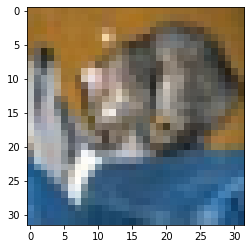

In [5]:
import needle as ndl
import numpy as np
from matplotlib import pyplot as plt


dataset = ndl.data.CIFAR10Dataset("data/cifar-10-batches-py", train=False)
img = dataset[0][0].transpose(1, 2, 0)
plt.imshow(img);

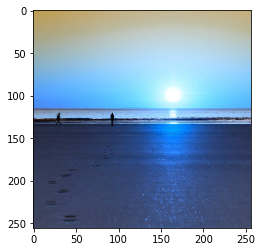

In [18]:
from pathlib import Path
from needle.autograd import Tensor


def plot_landscape(tensor: Tensor):
    img = tensor.permute((1, 2, 0)).numpy()
    img = (img + 1) / 2
    plt.imshow(img);


DATA_DIR = Path('./data/landscapes/')
IMAGE_FILES = sorted(str(x) for x in list(DATA_DIR.rglob('*.jpg')))

transforms = [
    ndl.data.RandomFlipHorizontal(),
    ndl.data.Lambda(lambda img: np.transpose(img, (2, 0, 1))),
    ndl.data.ToTensor()
]

dataset = ndl.data.LandscapesDataset(IMAGE_FILES, extra_transforms=transforms)
plot_landscape(dataset[12])